# Filter Design - Final Project

## Simeon Drapeau
## ECE 351-51
## Lab_12

## Introduction

The purpose of this lab is to apply the skills and knowledge learned from previous labs in a practical situation. In addition, this project aims to connect concepts across the various lab assignments over the semester.

## Deliverables

Task 1: Identify the noise magnitudes and corresponding frequencies due to the low frequency vibration, switching amplifier, position measurement information.

Task 2: Design an analog filter circuit to remove the noise and only pass the position measurement information. Type out the filter transfer function and insert a professional image of the circuit schematic. List the values of the passive components. All based on specifications given later.

Task 3: Generate a Bode plot of your filter.

Task 4: Filter the noisy sensor signal and demonstrate that the output signal has been correctly attenuated at the appropriate frequencies. 

### Task 1

What first must be done is the generation of the input signal as well as the identification of the noisy frequencies of contention. To do this, the signal must be transferred to the frequency domain through a Fourier Transform.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fftpack import fft, fftshift
from numpy import pi, angle, exp, sqrt

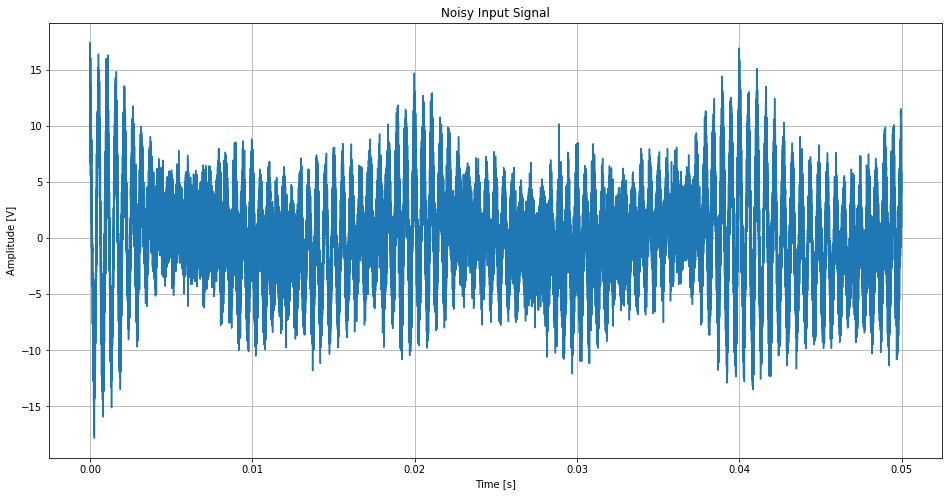

In [2]:
### Taken from Apprendix: Starter Code ###

# Load Input Signal
df = pd.read_csv('NoisySignal.csv')
t = df['0'].values
sensor_sig = df['1'].values
plt.figure(figsize=(16,8))
plt.plot(t,sensor_sig)
plt.grid(True)
plt.title('Noisy Input Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.show()

In [3]:
### Taken from Apprendix: stem() ###

def make_stem(ax, x, y, color='k', style='solid', label='', linewidths=2.5, **kwargs):
    ax.axhline(x[0],x[-1],0, color='r')
    ax.vlines(x, 0, y, color=color, linestyles=style, label=label, linewidths=linewidths)
    ax.set_ylim([1.05*y.min(), 1.05*y.max()])

In [4]:
### Taken from Lab_9 ###

def fourier(x,fs):
    N = len(x)                           #Find length of the signal
    X_fft = fft(x)                       #Perform the fas fourier transform
    X_fft_shifted = fftshift(X_fft)      #Shift zero frequency component to center of spectrum
    freq = np.arange(-N/2,N/2) * fs/N    #Compute the frequencies for the output signal
    X_mag = abs(X_fft_shifted) / N       #Compute the magnitudes of the signal
    X_phi = angle(X_fft_shifted)         #Compute the phases of the signal

    for i in range(len(X_phi)):
        if abs(X_mag[i])<1e-10:
            X_phi[i]=0
    return freq, X_mag, X_phi

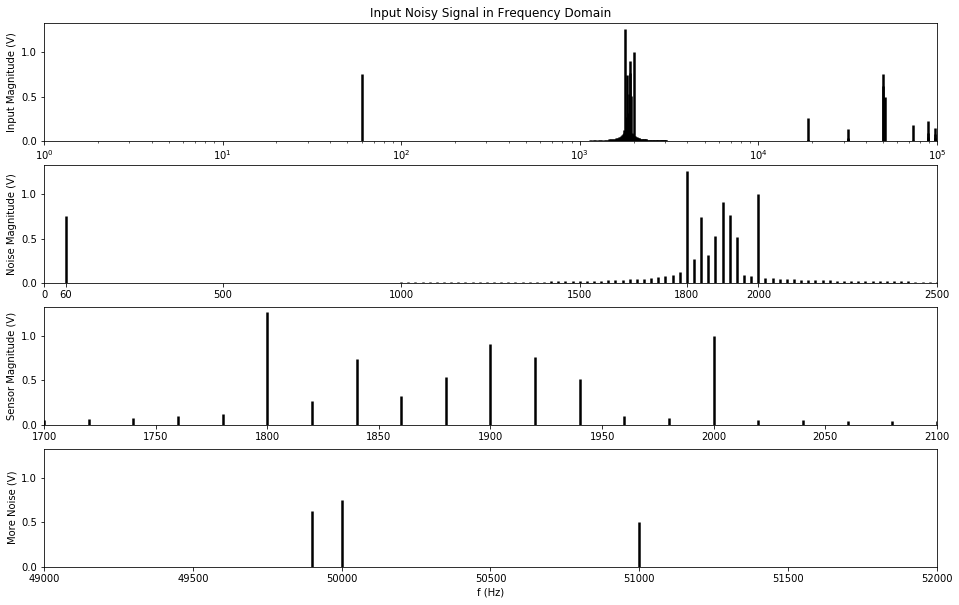

In [5]:
fs = 1e6
freq, Sen_mag, Sen_phi = fourier(sensor_sig,fs)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16,10))

plt.subplot(ax1)
plt.title('Input Noisy Signal in Frequency Domain')
plt.ylabel('Input Magnitude (V)')
make_stem(ax1, freq, Sen_mag)
plt.xlim([1, 100000])
plt.xscale('log')

plt.subplot(ax2)
plt.ylabel('Noise Magnitude (V)')
plt.xlim([0,2500])
make_stem(ax2, freq, Sen_mag)
extraticks = [60, 1800]
plt.xticks(list(plt.xticks()[0]) + extraticks)

plt.subplot(ax3)
plt.ylabel('Sensor Magnitude (V)')
plt.xlim([1700,2100])
make_stem(ax3, freq, Sen_mag)

plt.subplot(ax4)
plt.ylabel('More Noise (V)')
plt.xlim([49000,52000])
make_stem(ax4, freq, Sen_mag)

plt.xlabel('f (Hz)')
plt.show()

Noise can be seen at 60 and around the 50,000 Hertz range. Now a filter must be designed to eliminate these frequencies but allow the sensor frequency from 1800 to 2000 Hertz range.

### Task 2

The filter must meet the following specifications:

* The position measurement information is attenuated by less than -0.3dB
* The low-frequency vibration noise must be attenuated by at least -30dB
* The switching amplifier noise must be attenuated by at least -21dB
* All noise that exists at frequencies greater than 100kHz must be completely attenuated (magnitudes less than 0.05V can be considered completely attenuated for all practical purposes in this situation)

For this project, a parallel RLC Bandpass Filter will be used with the output on the capacitor. Since the transfer function of this circuit was previously derived in the priliminary of Lab 5, the resultant transfer function will only be shown here, which is: 

$$H(s) = \frac{Bs}{s^2 + Bs + w_{0}^2} = \frac{\frac{1}{RC}s}{s^2 + \frac{1}{RC}s + \frac{1}{LC}}$$

In [6]:
# Determine R,L,C, and wc's for Series RLC Circuit

# Given Values
rads = 2*pi      #rad/s
B= 200*rads      #Bandwidth
wc1= 1800*rads   #initial cutoff
wc2 = 2000*rads  #final cutoff

R = 1000  #Must choose an arbitary Value
C = 1/(B*R)
L = 1/(C*wc1*wc2)
wo = (1/sqrt(L*C))
w1 = ((-B/2) + sqrt(((B/2)**2) + ((wo)**2)))
w2 = ((B/2) + sqrt(((B/2)**2) + ((wo)**2)))

print('Series RLC Results\n\n'
      'R =', R, 'Ω\n'
      'L =', L, 'H\n'
      'C =', C, 'F\n'
      'B =', B, 'rad/s\n'
      'wc1 =', w1, 'rad/s\n'
      'wc2 =', w2, 'rad/s\n')

Series RLC Results

R = 1000 Ω
L = 0.008841941282883075 H
C = 7.957747154594767e-07 F
B = 1256.6370614359173 rad/s
wc1 = 11309.733552923255 rad/s
wc2 = 12566.370614359173 rad/s



Seen in the comments of the above code, an arbitrary value of $1 kΩ$ was used as an initial resistor value. These results prove that the final and initial cutoff frequencies, as well as the Bandwidth, are as they should be with respect to their units (rad/s). Below is the circuit diagram for Parallel RLC Circuit with the resulted values:

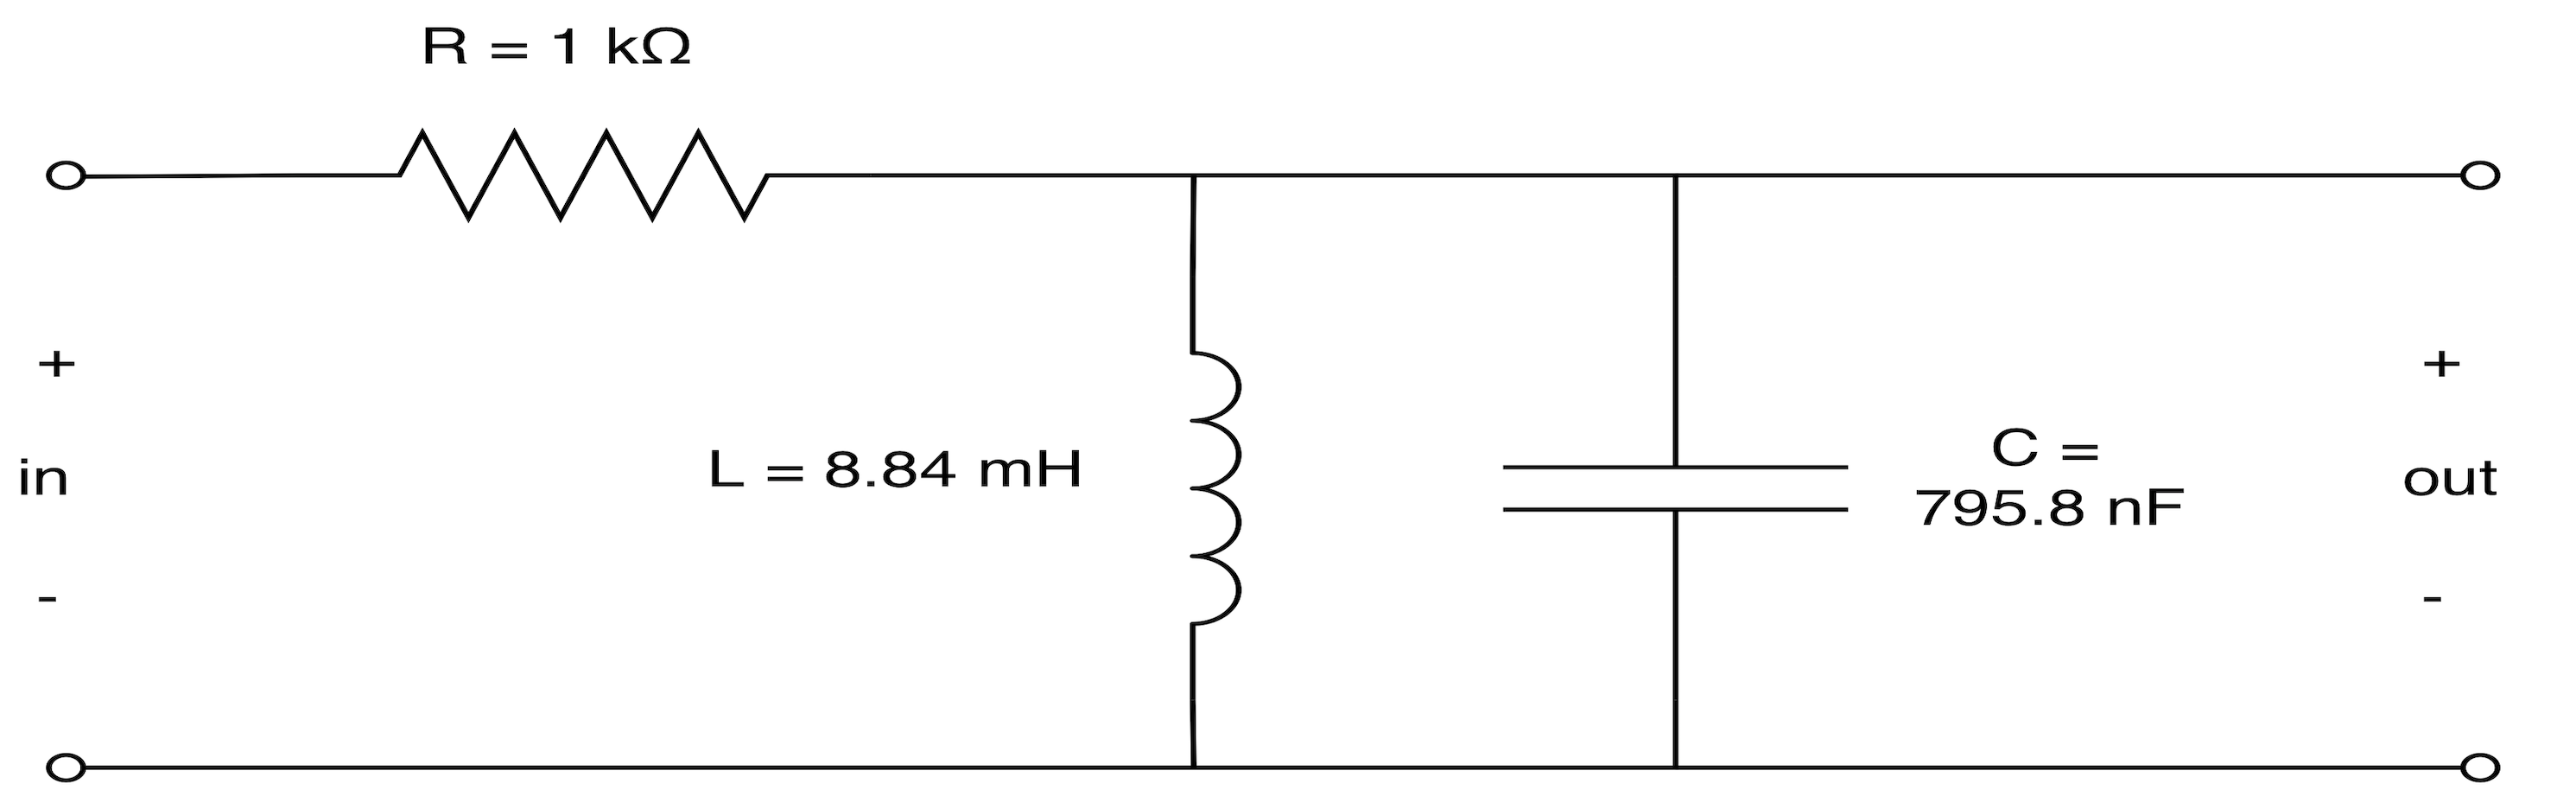

### Task 3

Now to prove that my RLC values for my Bandpass Circuit as seen above will only filter in the 1800 Hz to 2000 Hz (11,309 to 12,566 rad/s) range, a Bode plot was generated. 

Text(0.5, 0, 'w (rad/s)')

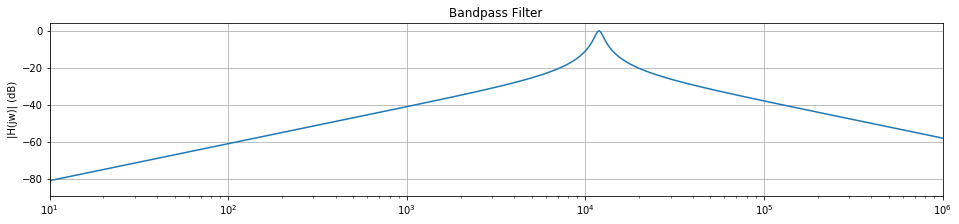

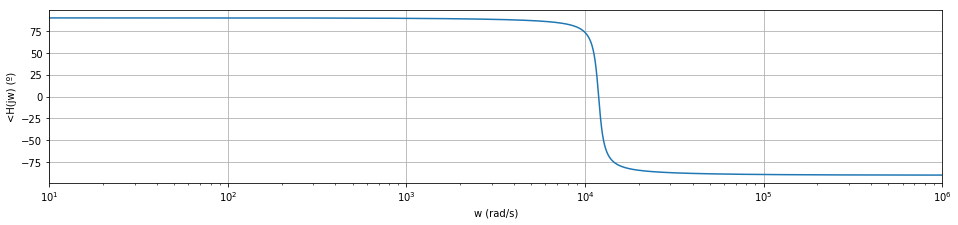

In [18]:
### Taken from Lab 10

wi = 1      #initial freq
wf = 1e6    #final freq
w = np.arange(wi*2*pi,wf*2*pi,10)

num_bode = [1/(R*C), 0]           #numerator of transfer function
den_bode = [1, 1/(R*C), 1/(L*C)]  #denominator of transfer function
w_bode, mag, phase = sig.bode((num_bode,den_bode), w)

plt.figure(figsize=(16,7))
plt.subplot(2,1,1)
plt.semilogx(w_bode,mag)
plt.xlim([10e0,10e5])
plt.grid(True)
plt.ylabel('|H(jw)| (dB)')
plt.title('Bandpass Filter')

plt.figure(figsize=(16,7))
plt.subplot(2,1,2)
plt.semilogx(w_bode,phase)
plt.xlim([10e0,10e5])
plt.grid(True)
plt.ylabel('<H(jw) (º)')
plt.xlabel('w (rad/s)')

### Task 4

Finally, to lastly prove that my circuit will filter out the noise of the input signal, the input signal will be passed through the filter. The output of the filter can be seen below in both the frequency and time domains.

Text(0.5, 1.0, 'Filtered Signal')

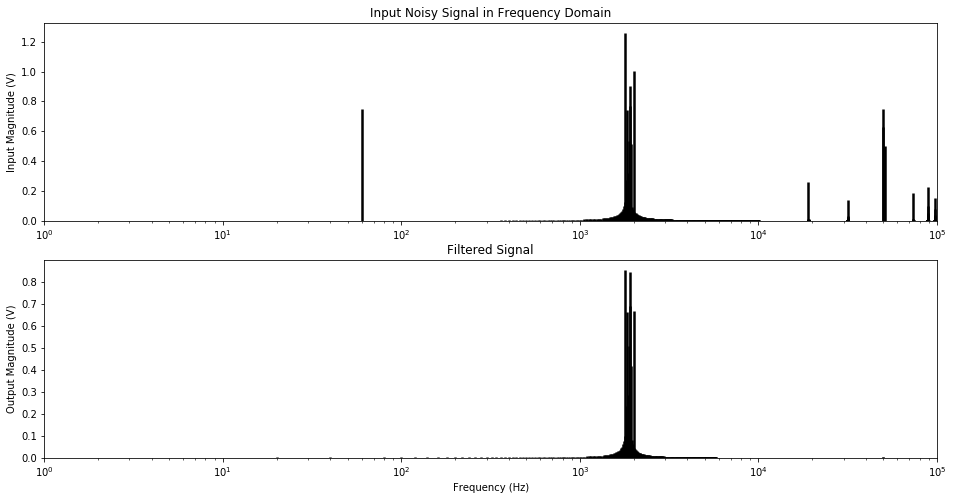

In [19]:
### Taken from Lab_10 ###

freq, Sen_mag, Sen_phi = fourier(sensor_sig,fs)

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(16,8))
plt.subplot(ax1)
plt.title('Input Noisy Signal in Frequency Domain')
plt.ylabel('Input Magnitude (V)')
make_stem(ax1, freq, Sen_mag)
plt.xlim([1, 100000])
plt.xscale('log')

num,den = sig.bilinear(num_bode,den_bode, fs)
y_out = sig.lfilter(num,den,sensor_sig) #Sen_mag for freq  sensor_sig for time

freq_f, Sen_mag_f, Sen_phi_f = fourier(y_out,f0)
plt.subplot(ax2)
make_stem(ax2,freq_f,Sen_mag_f)
plt.xlim([1,1e5])
plt.xscale('log')
plt.ylabel('Output Magnitude (V)')
plt.xlabel('Frequency (Hz)')
plt.title('Filtered Signal')

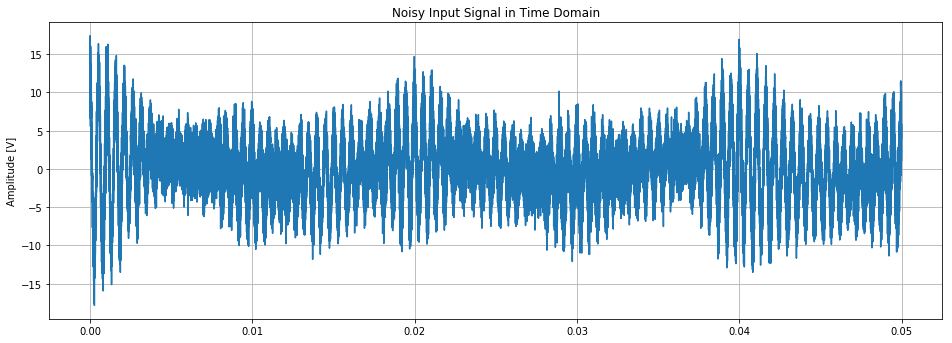

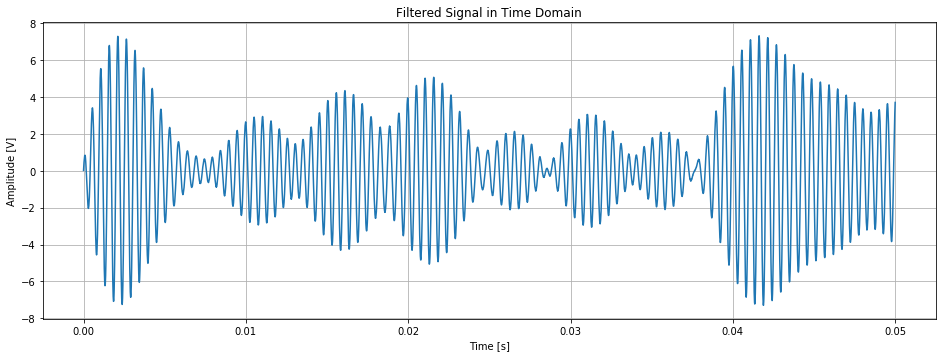

In [9]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.plot(t,sensor_sig)
plt.grid(True)
plt.title('Noisy Input Signal in Time Domain')
plt.ylabel('Amplitude [V]')
plt.show()

plt.figure(figsize=(16,12))
plt.subplot(2,1,2)
plt.plot(t,y_out)
plt.grid(True)
plt.title('Filtered Signal in Time Domain')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.show()

## Questions

1. Leave any feedback for improving this lab.

Not sure if this comment is necessarily for improvement of the lab, but it is just something to keep in mind: the most consuming portion (in terms of time) of this lab is the determination of the RLC values. For the 8 or so hours that I spent to get the proper results desired in this lab, about five of those hours came from trying to find the RLC values. It was not that my filter was not filtering out the right frequencies are finding such values, it was the time that it took to derive the formulas of R, L, and C. I kept getting the wrong frequency value in my calculator and in the python code because of many small mistakes in my hand calculations. I say all this to let it be known that I personally think that the majority of the time spent on this lab (or any of labs) should be mostly or all spent over the new/specific topic(s) rather than grunt work trying to calculate a very minute part of the lab.

## Conclusion

I thoroughly enjoyed all of these labs, but especially this one. The only thing that I did not care as much for was the time it took to calculate the R, L, and C values for the filter. But I understand that grunt work comes with every job and project. Seeing the final graph, the filtered input signal in the time domain, for the first time (and even now) was very satisfying. This class also taught me Python, which is an extremely powerful program yet a very easy tool to use. I would have to say that this lab was one of my favorites and has been probably the most beneficial to my learning here at the university.